In [51]:
%pip install pandas
%pip install matplotlib
%pip install imbalanced-learn
%pip install numpy

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [53]:
df = pd.read_csv('good_customer.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1723 entries, 0 to 1722
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   month                1723 non-null   int64 
 1   credit_amount        1723 non-null   int64 
 2   credit_term          1723 non-null   int64 
 3   age                  1723 non-null   int64 
 4   sex                  1723 non-null   object
 5   education            1723 non-null   object
 6   product_type         1723 non-null   object
 7   having_children_flg  1723 non-null   int64 
 8   region               1723 non-null   int64 
 9   income               1723 non-null   int64 
 10  family_status        1723 non-null   object
 11  phone_operator       1723 non-null   int64 
 12  is_client            1723 non-null   int64 
 13  bad_client_target    1723 non-null   int64 
dtypes: int64(10), object(4)
memory usage: 188.6+ KB


In [54]:
df.head(10)

,month,credit_amount,credit_term,age,sex,education,product_type,having_children_flg,region,income,family_status,phone_operator,is_client,bad_client_target
0,1,7000,12,39,male,Secondary special education,Cell phones,0,2,21000,Another,0,0,0
1,1,19000,6,20,male,Secondary special education,Household appliances,1,2,17000,Another,3,1,0
2,1,29000,12,23,female,Secondary special education,Household appliances,0,2,31000,Another,2,0,0
3,1,10000,12,30,male,Secondary special education,Cell phones,1,2,31000,Unmarried,3,1,0
4,1,14500,12,25,female,Higher education,Cell phones,0,2,26000,Married,0,1,0
5,1,32500,24,47,female,Secondary special education,Furniture,0,2,26000,Married,0,1,0
6,1,8000,3,23,male,Higher education,Computers,0,2,21000,Another,0,1,0
7,1,20000,10,25,female,Higher education,Household appliances,0,0,33000,Married,2,1,0
8,1,26000,6,21,female,Secondary special education,Cell phones,0,0,31000,Another,2,1,0
9,1,15000,24,25,female,Secondary special education,Household appliances,1,2,26000,Another,3,0,0


In [55]:
rows_with_nan = df.isna().any(axis=1)

# Display rows that contain at least one NaN value
nan_rows = df[rows_with_nan]

nan_rows

,month,credit_amount,credit_term,age,sex,education,product_type,having_children_flg,region,income,family_status,phone_operator,is_client,bad_client_target


In [56]:
df.describe()

,month,credit_amount,credit_term,age,having_children_flg,region,income,phone_operator,is_client,bad_client_target
count,1723.000000,1723.000000,1723.000000,1723.000000,1723.000000,1723.000000,1723.000000,1723.000000,1723.000000,1723.000000
mean,6.708067,29264.654672,11.546721,35.911782,0.428323,1.681370,32652.350551,1.125363,0.604759,0.113755
std,3.538420,27926.778301,6.548354,13.120203,0.494979,0.704256,20913.193158,1.015822,0.489044,0.317606
min,1.000000,5000.000000,3.000000,18.000000,0.000000,0.000000,1000.000000,0.000000,0.000000,0.000000
25%,3.000000,13000.000000,6.000000,26.000000,0.000000,2.000000,21000.000000,0.000000,0.000000,0.000000
50%,7.000000,21500.000000,12.000000,32.000000,0.000000,2.000000,27000.000000,1.000000,1.000000,0.000000
75%,10.000000,34000.000000,12.000000,44.000000,1.000000,2.000000,38000.000000,2.000000,1.000000,0.000000
max,12.000000,301000.000000,36.000000,90.000000,1.000000,2.000000,401000.000000,4.000000,1.000000,1.000000


In [57]:
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE


label_encoder = LabelEncoder()
df["sex"] = label_encoder.fit_transform(df["sex"])
df["education"] = label_encoder.fit_transform(df["education"])
df["product_type"] = label_encoder.fit_transform(df["product_type"])
df["family_status"] = label_encoder.fit_transform(df["family_status"])


X = df.drop("bad_client_target", axis=1)
y = df["bad_client_target"]

smote = SMOTE(sampling_strategy={1: 1500}, k_neighbors=4, random_state=10)
X_resampled, y_resampled = smote.fit_resample(X, y)


resampled_quality_distribution = pd.Series(y_resampled).value_counts().sort_index()

resampled_quality_distribution

bad_client_target
0    1527
1    1500
Name: count, dtype: int64

In [58]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

X_train_resampled, X_test_resampled, y_train_resampled, y_test_resampled = train_test_split(
    X_resampled, y_resampled, test_size=0.25, random_state=10)

X_train_original, X_test_original, y_train_original, y_test_original = train_test_split(
    X, y, test_size=0.25, random_state=10)

classifiers = {
    "Decision Tree": DecisionTreeClassifier(random_state=10),
    "SVM": SVC(random_state=10),
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=10),
    "Naive Bayes": GaussianNB()
}

def train_evaluate_classifiers(classifiers, X_train, y_train, X_test, y_test):
    accuracies = {}
    for name, clf in classifiers.items():
        # Train the classifier
        clf.fit(X_train, y_train)

        # Predict on the test set
        y_pred = clf.predict(X_test)

        # Calculate accuracy
        accuracy = accuracy_score(y_test, y_pred)
        accuracies[name] = accuracy
        print(f"{name} Accuracy: {accuracy:.4f}")

    return accuracies


scaler_resampled = StandardScaler()
X_train_resampled_scaled = scaler_resampled.fit_transform(X_train_resampled)
X_test_resampled_scaled = scaler_resampled.transform(X_test_resampled)

scaler_original = StandardScaler()
X_train_original_scaled = scaler_original.fit_transform(X_train_original)
X_test_original_scaled = scaler_original.transform(X_test_original)

print("Performance on Scaled Resampled Data:")
resampled_accuracies_scaled = train_evaluate_classifiers(classifiers, X_train_resampled_scaled, y_train_resampled, X_test_resampled_scaled, y_test_resampled)

print("\nPerformance on Scaled Original Data:")
original_accuracies_scaled = train_evaluate_classifiers(classifiers, X_train_original_scaled, y_train_original, X_test_original_scaled, y_test_original)

Performance on Scaled Resampled Data:
Decision Tree Accuracy: 0.8375


SVM Accuracy: 0.8230
Logistic Regression Accuracy: 0.7358
Naive Bayes Accuracy: 0.7160

Performance on Scaled Original Data:
Decision Tree Accuracy: 0.7935
SVM Accuracy: 0.8910
Logistic Regression Accuracy: 0.8886
Naive Bayes Accuracy: 0.8283


In [59]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ParameterGrid

param_grids = {
    "Decision Tree": {
        'max_depth': [None, 10, 20, 30, 40, 50],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    "SVM": {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'rbf', 'poly']
    },
    "Logistic Regression": {
        'C': [0.001, 0.01, 0.1, 1, 10, 100],
        'penalty': ['l1', 'l2', 'elasticnet', 'none'],
        'solver': ['saga'],
        'l1_ratio': [None, 0.2, 0.4, 0.6, 0.8]  # Use None for other penalties, specific values for 'elasticnet'
    },
    "Naive Bayes": {
        'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6]
    }
}

def hyperparameter_optimization(classifiers, param_grids, X_train, y_train):
    best_params = {}
    for name, clf in classifiers.items():
        print(f"Optimizing {name}...")

        # Custom iterator to skip incompatible combinations
        param_iter = (params for params in ParameterGrid(param_grids[name])
                      if not (params['penalty'] == 'elasticnet' and params['l1_ratio'] is None))

        # Grid search for hyperparameters
        grid_search = GridSearchCV(clf, param_grid=param_grids[name], cv=5, n_jobs=-1, verbose=2)
        grid_search.fit(X_train, y_train)

        # Store best parameters
        best_params[name] = grid_search.best_params_
        print(f"Best parameters for {name}: {grid_search.best_params_}\n")

    return best_params


optimized_parameters = hyperparameter_optimization(classifiers, param_grids, X_train_resampled_scaled, y_train_resampled)

Optimizing Decision Tree...
Fitting 5 folds for each of 54 candidates, totalling 270 fits
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=2; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=2; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=2; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=10; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=10; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=4, min_samples_split=5; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split

/home/stavre/miniconda3/envs/pyenv_rcs/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/home/stavre/miniconda3/envs/pyenv_rcs/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/stavre/miniconda3/envs/pyenv_rcs/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/home/stavre/miniconda3/envs/pyenv_rcs/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/stavre/miniconda3/envs/pyenv_rcs/lib/python3.8/site-packages/sklearn/linear_mo

[CV] END ...C=0.001, l1_ratio=0.6, penalty=none, solver=saga; total time=   0.0s
[CV] END ...C=0.001, l1_ratio=0.6, penalty=none, solver=saga; total time=   0.0s
[CV] END ...C=0.001, l1_ratio=0.6, penalty=none, solver=saga; total time=   0.0s
[CV] END .....C=0.001, l1_ratio=0.8, penalty=l1, solver=saga; total time=   0.0s
[CV] END .....C=0.001, l1_ratio=0.8, penalty=l1, solver=saga; total time=   0.0s
[CV] END .....C=0.001, l1_ratio=0.8, penalty=l1, solver=saga; total time=   0.0s
[CV] END .....C=0.001, l1_ratio=0.8, penalty=l1, solver=saga; total time=   0.0s
[CV] END ...C=0.001, l1_ratio=0.6, penalty=none, solver=saga; total time=   0.0s
[CV] END .....C=0.001, l1_ratio=0.8, penalty=l1, solver=saga; total time=   0.0s
[CV] END .....C=0.001, l1_ratio=0.8, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=0.001, l1_ratio=0.8, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=0.001, l1_ratio=0.8, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END .....C=0.001,

/home/stavre/miniconda3/envs/pyenv_rcs/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
/home/stavre/miniconda3/envs/pyenv_rcs/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/home/stavre/miniconda3/envs/pyenv_rcs/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/stavre/miniconda3/envs/pyenv_rcs/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
/home/stavre/miniconda3/envs/pyenv_rcs/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1183:

[CV] END .......C=0.1, l1_ratio=0.2, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=0.1, l1_ratio=0.2, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=0.1, l1_ratio=0.2, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END .....C=0.1, l1_ratio=0.2, penalty=none, solver=saga; total time=   0.0s
[CV] END .....C=0.1, l1_ratio=0.2, penalty=none, solver=saga; total time=   0.0s
[CV] END .....C=0.1, l1_ratio=0.2, penalty=none, solver=saga; total time=   0.0s
[CV] END C=0.1, l1_ratio=0.2, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=0.1, l1_ratio=0.2, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END .....C=0.1, l1_ratio=0.2, penalty=none, solver=saga; total time=   0.0s
[CV] END C=0.1, l1_ratio=0.2, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END .......C=0.1, l1_ratio=0.4, penalty=l1, solver=saga; total time=   0.0s
[CV] END .....C=0.1, l1_ratio=0.2, penalty=none, solver=saga; total time=   0.0s
[CV] END .......C=0.1, 

/home/stavre/miniconda3/envs/pyenv_rcs/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/home/stavre/miniconda3/envs/pyenv_rcs/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/home/stavre/miniconda3/envs/pyenv_rcs/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/home/stavre/miniconda3/envs/pyenv_rcs/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/home/stavre/miniconda3/envs/pyenv_rcs/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio paramet

[CV] END ........C=10, l1_ratio=0.2, penalty=l2, solver=saga; total time=   0.0s
[CV] END ........C=10, l1_ratio=0.2, penalty=l2, solver=saga; total time=   0.0s
[CV] END ........C=10, l1_ratio=0.2, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=10, l1_ratio=0.2, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=10, l1_ratio=0.2, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=10, l1_ratio=0.2, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=10, l1_ratio=0.2, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=10, l1_ratio=0.2, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END ......C=10, l1_ratio=0.2, penalty=none, solver=saga; total time=   0.0s
[CV] END ......C=10, l1_ratio=0.2, penalty=none, solver=saga; total time=   0.0s
[CV] END ......C=10, l1_ratio=0.2, penalty=none, solver=saga; total time=   0.0s
[CV] END ......C=10, l1_ratio=0.2, penalty=none, solver=saga; total time=   0.0s
[CV] END ........C=10, l1_ra

/home/stavre/miniconda3/envs/pyenv_rcs/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
/home/stavre/miniconda3/envs/pyenv_rcs/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/home/stavre/miniconda3/envs/pyenv_rcs/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/stavre/miniconda3/envs/pyenv_rcs/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
/home/stavre/miniconda3/envs/pyenv_rcs/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1183:

In [60]:
optimized_parameters

{'Decision Tree': {'max_depth': None,
  'min_samples_leaf': 2,
  'min_samples_split': 5},
 'SVM': {'C': 10, 'kernel': 'rbf'},
 'Logistic Regression': {'C': 0.1,
  'l1_ratio': 0.6,
  'penalty': 'elasticnet',
  'solver': 'saga'},
 'Naive Bayes': {'var_smoothing': 1e-09}}

In [61]:
def plot_decision_boundaries(X, y, model, title):
    # Define the grid range
    h = 0.02  # step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Predict class for each point in the grid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plotting
    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors="k", s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(title)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")

In [62]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, f1_score
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Convert the 'type' column to numerical values using Label Encoding
label_encoder = LabelEncoder()

# Model initializations
classifiers = {
    "Decision Tree": DecisionTreeClassifier(),
    "SVM": SVC(probability=True),
    "Logistic Regression": LogisticRegression(max_iter=10000),
    "Naive Bayes": GaussianNB(),
}

# Levels of imbalance to be tested
imbalance_levels = [500, 750, 1000, 1250, 1500]

accuracy_results = {}
f1_score_results = {}

for level in imbalance_levels:
    print(f"\n\nTesting for imbalance level: {level} synthetic samples\n{'-'*50}")

    current_accuracies = {}
    current_f1_scores = {}

    # Apply SMOTE to generate synthetic samples for the minority class (quality = 9 and 3)
    smote = SMOTE(
        sampling_strategy={1: level},
        k_neighbors=4,
        random_state=10,
    )
    X_resampled_scaled, y_resampled_scaled = smote.fit_resample(X, y)

    # Split the resampled data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(
        X_resampled_scaled, y_resampled_scaled, test_size=0.3, random_state=10
    )

    for name, clf in classifiers.items():
        clf.fit(X_train, y_train)
        predictions = clf.predict(X_test)
        accuracy = accuracy_score(y_test, predictions)
        f1 = f1_score(y_test, predictions)
        current_accuracies[name] = accuracy
        current_f1_scores[name] = f1
        print(f"Accuracy for {name}: {accuracy:.4f}")
        print(
            f"Classification Report for {name}:\n",
            classification_report(y_test, predictions),
        )
        print("-" * 50)

        if name == "SVM":
            prob_predictions = clf.predict_proba(X_test)  # Get predicted probabilities
            # Extract probabilities for the positive class (assuming it's the second column)
            pos_prob_predictions = prob_predictions[:, 1]
            roc_auc = roc_auc_score(y_test, pos_prob_predictions)  # Calculate ROC AUC
            print(f"SVM on Dataset with Imbalance Level {level}")
            print(classification_report(y_test, predictions))
            print("ROC AUC Score:", roc_auc)
            print("-" * 50)

    for name, accuracy in current_accuracies.items():
        if name not in accuracy_results:
            accuracy_results[name] = []
        accuracy_results[name].append(accuracy)
        
        
    for name, f1 in current_f1_scores.items():
        if name not in f1_score_results:
            f1_score_results[name] = []
        f1_score_results[name].append(f1)



Testing for imbalance level: 500 synthetic samples
--------------------------------------------------
Accuracy for Decision Tree: 0.7652
Classification Report for Decision Tree:
               precision    recall  f1-score   support

           0       0.87      0.81      0.84       459
           1       0.52      0.62      0.57       150

    accuracy                           0.77       609
   macro avg       0.69      0.72      0.70       609
weighted avg       0.78      0.77      0.77       609

--------------------------------------------------
Accuracy for SVM: 0.7537
Classification Report for SVM:
               precision    recall  f1-score   support

           0       0.75      1.00      0.86       459
           1       0.00      0.00      0.00       150

    accuracy                           0.75       609
   macro avg       0.38      0.50      0.43       609
weighted avg       0.57      0.75      0.65       609

--------------------------------------------------
SVM on

/home/stavre/miniconda3/envs/pyenv_rcs/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/stavre/miniconda3/envs/pyenv_rcs/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/stavre/miniconda3/envs/pyenv_rcs/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_sta

Accuracy for SVM: 0.6725
Classification Report for SVM:
               precision    recall  f1-score   support

           0       0.67      1.00      0.80       460
           1       0.00      0.00      0.00       224

    accuracy                           0.67       684
   macro avg       0.34      0.50      0.40       684
weighted avg       0.45      0.67      0.54       684

--------------------------------------------------
SVM on Dataset with Imbalance Level 750
              precision    recall  f1-score   support

           0       0.67      1.00      0.80       460
           1       0.00      0.00      0.00       224

    accuracy                           0.67       684
   macro avg       0.34      0.50      0.40       684
weighted avg       0.45      0.67      0.54       684

ROC AUC Score: 0.5714673913043478
--------------------------------------------------
Accuracy for Logistic Regression: 0.6944
Classification Report for Logistic Regression:
               precision 

/home/stavre/miniconda3/envs/pyenv_rcs/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/stavre/miniconda3/envs/pyenv_rcs/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/stavre/miniconda3/envs/pyenv_rcs/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_sta

Accuracy for SVM: 0.5903
Classification Report for SVM:
               precision    recall  f1-score   support

           0       0.59      1.00      0.74       448
           1       0.00      0.00      0.00       311

    accuracy                           0.59       759
   macro avg       0.30      0.50      0.37       759
weighted avg       0.35      0.59      0.44       759

--------------------------------------------------
SVM on Dataset with Imbalance Level 1000
              precision    recall  f1-score   support

           0       0.59      1.00      0.74       448
           1       0.00      0.00      0.00       311

    accuracy                           0.59       759
   macro avg       0.30      0.50      0.37       759
weighted avg       0.35      0.59      0.44       759

ROC AUC Score: 0.5945753904455673
--------------------------------------------------
Accuracy for Logistic Regression: 0.6509
Classification Report for Logistic Regression:
               precision

/home/stavre/miniconda3/envs/pyenv_rcs/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/stavre/miniconda3/envs/pyenv_rcs/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/stavre/miniconda3/envs/pyenv_rcs/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_sta

Accuracy for SVM: 0.5731
Classification Report for SVM:
               precision    recall  f1-score   support

           0       0.61      0.67      0.64       469
           1       0.51      0.45      0.48       365

    accuracy                           0.57       834
   macro avg       0.56      0.56      0.56       834
weighted avg       0.57      0.57      0.57       834

--------------------------------------------------
SVM on Dataset with Imbalance Level 1250
              precision    recall  f1-score   support

           0       0.61      0.67      0.64       469
           1       0.51      0.45      0.48       365

    accuracy                           0.57       834
   macro avg       0.56      0.56      0.56       834
weighted avg       0.57      0.57      0.57       834

ROC AUC Score: 0.5808861757747467
--------------------------------------------------
Accuracy for Logistic Regression: 0.6667
Classification Report for Logistic Regression:
               precision

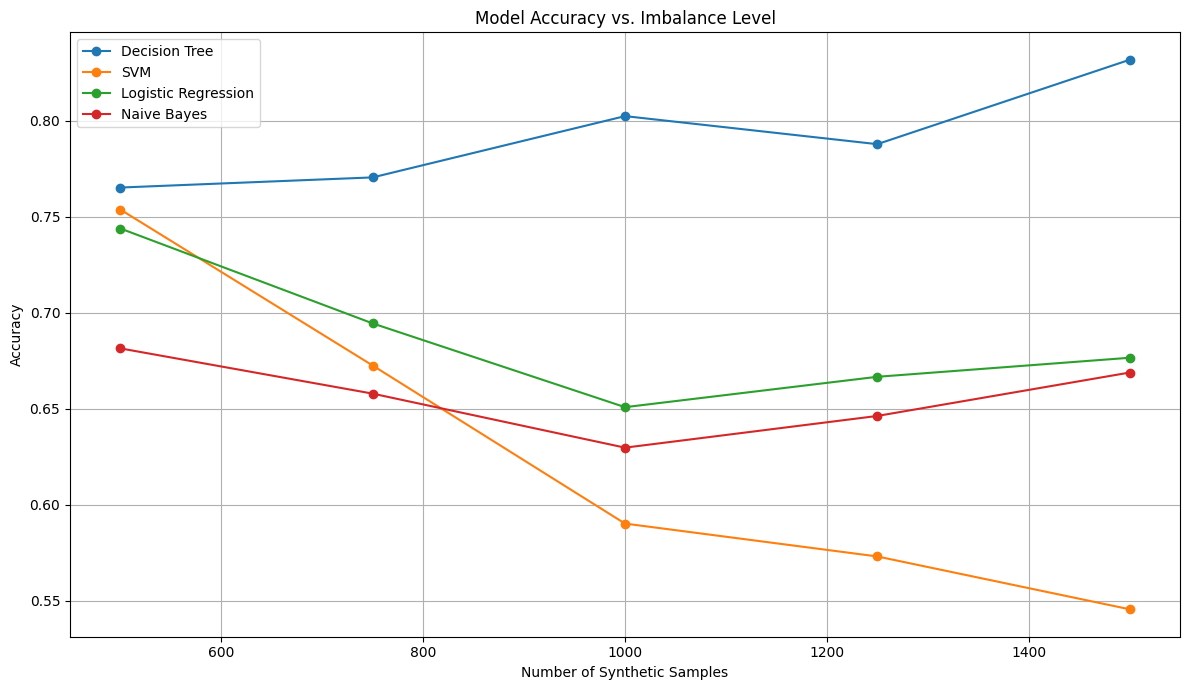

In [63]:
# Plotting
plt.figure(figsize=(12, 7))
for name, accuracies in accuracy_results.items():
    plt.plot(imbalance_levels, accuracies, label=name, marker="o")

plt.title("Model Accuracy vs. Imbalance Level")
plt.xlabel("Number of Synthetic Samples")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

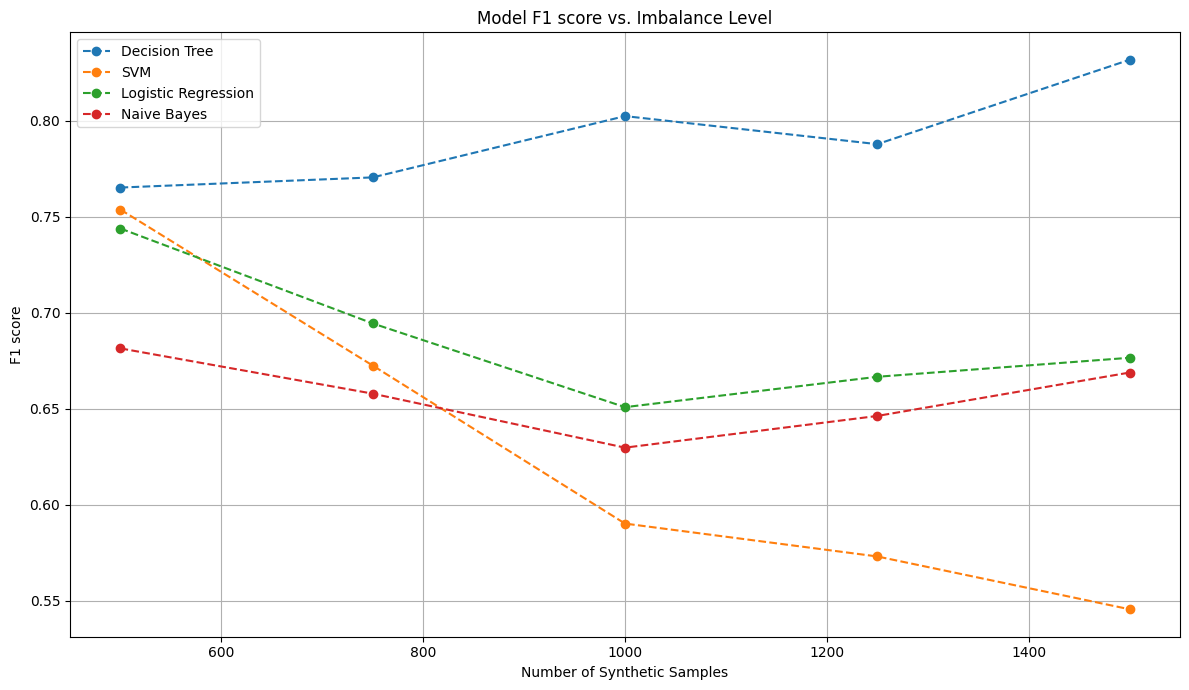

In [64]:
plt.figure(figsize=(12, 7))
for name, accuracies in accuracy_results.items():
    plt.plot(imbalance_levels, accuracies, label=name, marker="o", linestyle='--')

plt.title("Model F1 score vs. Imbalance Level")
plt.xlabel("Number of Synthetic Samples")
plt.ylabel("F1 score")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [65]:
accuracy_results = {name: [] for name in classifiers}
f1_score_results = {name: [] for name in classifiers}
strategies = ["auto", "minority", "all", "not majority", "not minority"]


for strategy in strategies:
    smote = SMOTE(
        sampling_strategy=strategy, random_state=10, k_neighbors=4
    )
    X_resampled, y_resampled = smote.fit_resample(X, y)

    X_train, X_test, y_train, y_test = train_test_split(
        X_resampled, y_resampled, test_size=0.3, random_state=10
    )

    for name, clf in classifiers.items():
        clf.fit(X_train, y_train)
        predictions = clf.predict(X_test)
        accuracy = accuracy_score(y_test, predictions)
        accuracy_results[name].append(accuracy)
        f1 = f1_score(y_test, predictions, average="weighted")
        f1_score_results[name].append(f1)
        print(f"F1 Score for {name}: {f1:.4f}")
        print(f"Accuracy for {name}: {accuracy:.4f}")
        print(
            f"Classification Report for {name}:\n",
            classification_report(y_test, predictions),
        )
        print("-" * 50)

F1 Score for Decision Tree: 0.8340
Accuracy for Decision Tree: 0.8342
Classification Report for Decision Tree:
               precision    recall  f1-score   support

           0       0.86      0.80      0.83       460
           1       0.81      0.87      0.84       457

    accuracy                           0.83       917
   macro avg       0.84      0.83      0.83       917
weighted avg       0.84      0.83      0.83       917

--------------------------------------------------
F1 Score for SVM: 0.5303
Accuracy for SVM: 0.5485
Classification Report for SVM:
               precision    recall  f1-score   support

           0       0.58      0.35      0.44       460
           1       0.53      0.75      0.62       457

    accuracy                           0.55       917
   macro avg       0.56      0.55      0.53       917
weighted avg       0.56      0.55      0.53       917

--------------------------------------------------
F1 Score for Logistic Regression: 0.6955
Accuracy 

/home/stavre/miniconda3/envs/pyenv_rcs/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/stavre/miniconda3/envs/pyenv_rcs/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/stavre/miniconda3/envs/pyenv_rcs/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_sta

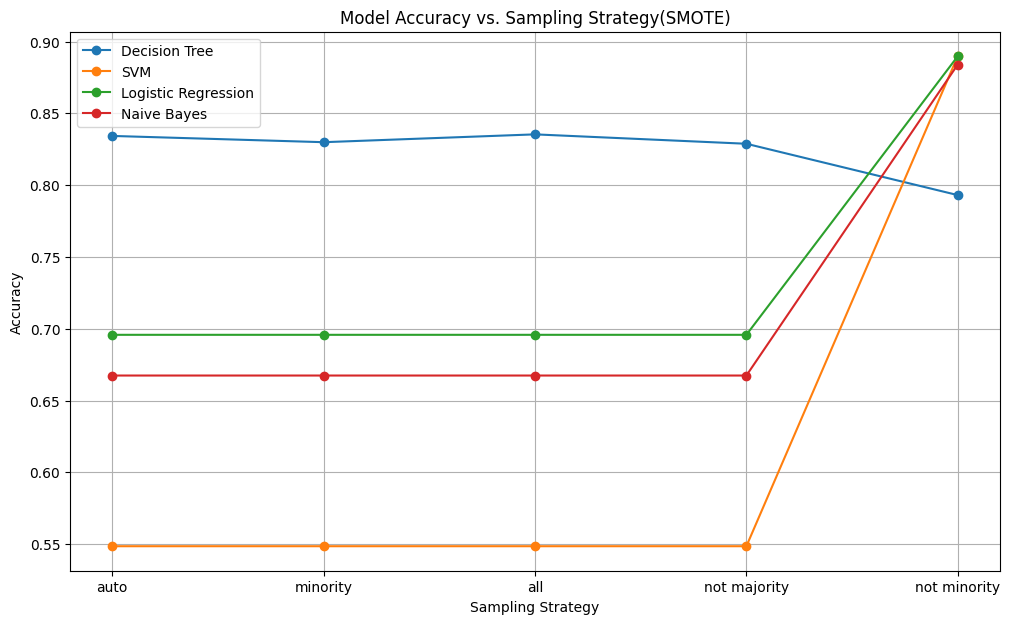

In [66]:
# Plotting the results for each undersampler
plt.figure(figsize=(12, 7))
for name, accuracies in accuracy_results.items():
    plt.plot(strategies, accuracies, label=name, marker="o")

# plt.title(f"Model Accuracy vs. Imbalance Level ({sampler_name})")
plt.title(f"Model Accuracy vs. Sampling Strategy(SMOTE)")
plt.xlabel("Sampling Strategy")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

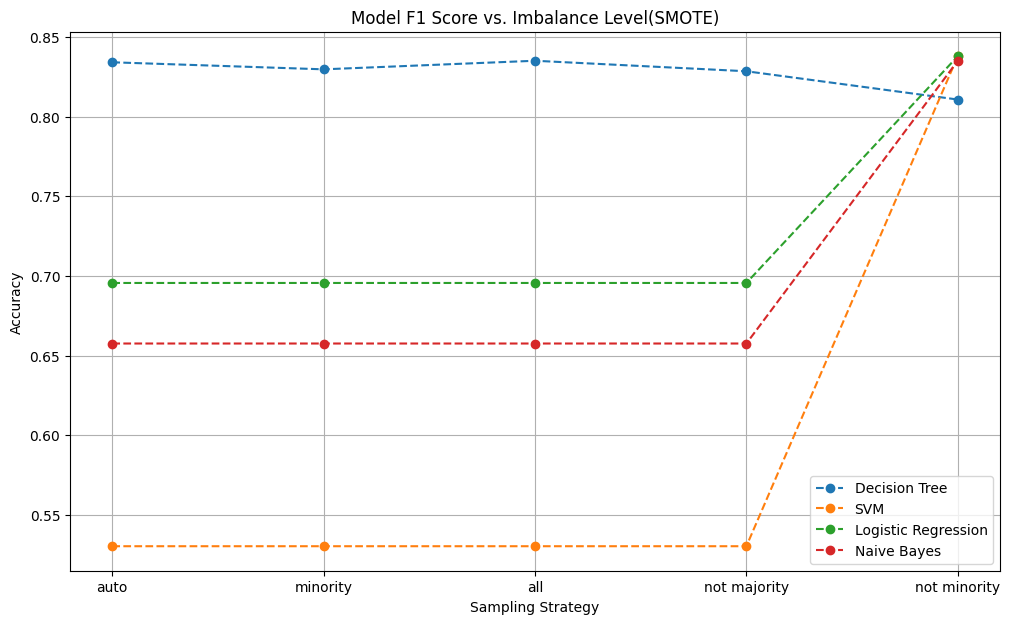

In [67]:
# Plotting the results for each undersampler
plt.figure(figsize=(12, 7))
for name, f1_scores in f1_score_results.items():
    plt.plot(strategies, f1_scores, label=name, marker="o", linestyle="--")

# plt.title(f"Model Accuracy vs. Imbalance Level ({sampler_name})")
plt.title(f"Model F1 Score vs. Imbalance Level(SMOTE)")
plt.xlabel("Sampling Strategy")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()